<a href="https://colab.research.google.com/github/Hansaraj09/PCA_on_Wine/blob/main/PCA_on_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [64]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [65]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [66]:
# We need to remove duplicated rows and missing value rows
import pandas as pd

# Load the Wine Quality dataset
wine_data = pd.read_csv(wine_data_path)
print("Wine Data Shape :", wine_data.shape)
# Drop rows with missing values
wine_data = wine_data.dropna()

# Dropping Duplicates rows
wine_data.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping-) :", wine_data.shape)


Wine Data Shape : (6497, 13)
Wine Data Shape (After Dropping-) : (5295, 13)


In [67]:
wine = wine_data.copy()

In [68]:
# Your Code goes Here
wine.shape

(5295, 13)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [74]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [75]:
X = wine.iloc[:,1:]
y = wine.iloc[:,0]

In [76]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [77]:
y

,type
0,white
1,white
2,white
3,white
6,white
...,...
6490,red
6491,red
6492,red
6495,red


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
std = StandardScaler()

In [80]:
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [81]:
knn = KNeighborsClassifier()

In [82]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [83]:
y_pred = knn.predict(X_test_scaled)

In [84]:
print(accuracy_score(y_test,y_pred))

0.9933899905571294


In [85]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [86]:
knn= KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
y_pred = knn.predict(X_test_pca)
print(accuracy_score(y_test,y_pred))

0.9886685552407932


In [87]:
X_train_pca

array([[ 0.77094542, -0.96872797,  1.26840874, -0.32862268, -0.76057013],
       [ 0.85943914, -2.99625952, -0.28989036,  1.24200045, -0.05963835],
       [ 0.81473972, -0.55309941, -0.54294179, -0.66707986, -1.08498226],
       ...,
       [-1.11810261, -3.48293183, -1.00267272,  2.65259562,  0.33940718],
       [-2.00004179, -0.28831498, -0.68337614,  1.76420114, -1.0309266 ],
       [ 0.68368454, -0.06696754,  0.08570511,  1.00399529,  0.56392849]])

In [88]:
pca.explained_variance_

array([3.04132576, 2.64834255, 1.65135526, 1.07374019, 0.84749993])

In [89]:
pca.components_.shape

(5, 12)

In [90]:
pca.explained_variance_ratio_

array([0.25338398, 0.22064311, 0.13758045, 0.08945723, 0.07060832])

In [91]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [92]:
pca.explained_variance_.shape

(12,)

In [93]:
pca.components_.shape

(12, 12)

In [94]:
pca.explained_variance_ratio_

array([0.25338398, 0.22064311, 0.13758045, 0.08945723, 0.07060832,
       0.05464252, 0.0451817 , 0.04242425, 0.03938657, 0.02514279,
       0.01862054, 0.00292855])

In [95]:
import numpy as np

In [96]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25338398, 0.47402709, 0.61160755, 0.70106477, 0.77167309,
       0.82631561, 0.87149731, 0.91392156, 0.95330812, 0.97845091,
       0.99707145, 1.        ])

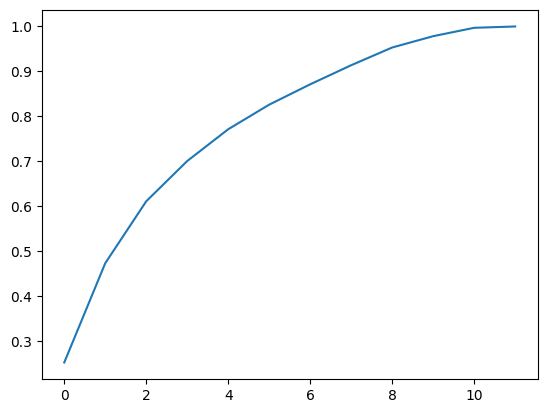

In [97]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# thus best results are obtained at n_components = 7 to 8